## Using Sparse Matrix Operations

In [24]:
from stareg.bspline import Bspline
import numpy as np
import plotly.express as px

from scipy.sparse import csr_matrix 
from scipy.sparse.linalg import inv

In [45]:
x = np.linspace(0,1,100000)
y = np.exp(-(x - 0.4)**2 / 0.02) + np.sin(x)*0.2

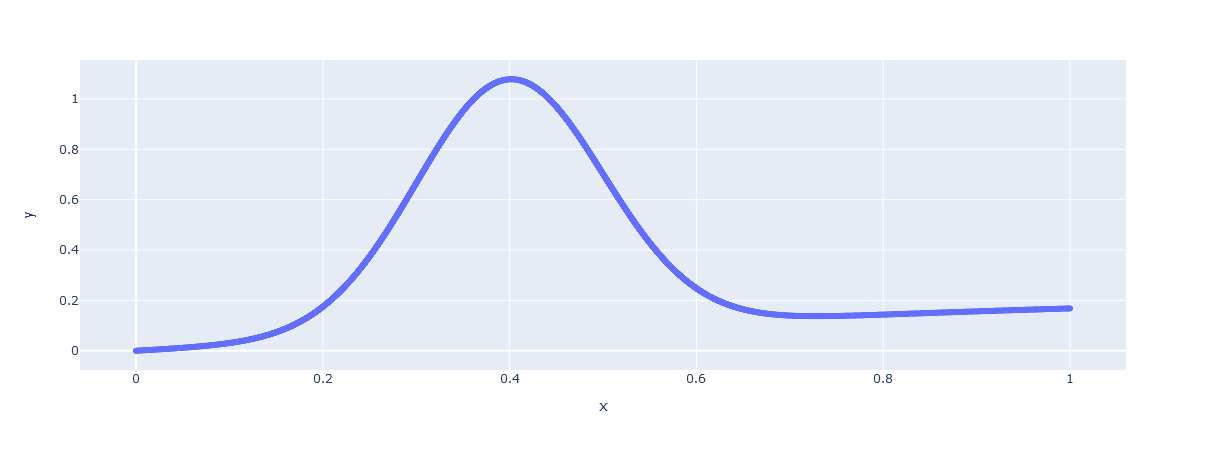

In [36]:
px.scatter(x=x, y=y)

In [46]:
# bspline paramters
n_knots = 15

In [47]:
B = Bspline()
B.bspline_basis(x_data=x, k=n_knots)

In [48]:
basis = B.basis
basis_sparse = csr_matrix(basis)

In [40]:
# solve (B.T @ B)^-1 @ B.T *y

In [42]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import inv

In [49]:
%%timeit
beta = np.linalg.pinv(basis.T @ basis) @ basis.T * y

12.2 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [69]:
basis_sparse.transpose()

<15x15 sparse matrix of type '<class 'numpy.float64'>'
	with 93 stored elements in Compressed Sparse Column format>

In [68]:
basis_sparse

<100000x15 sparse matrix of type '<class 'numpy.float64'>'
	with 399996 stored elements in Compressed Sparse Row format>

In [64]:
basis_sparse.multiply(basis_sparse)
    

<100000x15 sparse matrix of type '<class 'numpy.float64'>'
	with 399996 stored elements in Compressed Sparse Row format>

In [58]:
%%timeit
beta_sparse = inv(basis_sparse.multiply(basis_sparse)).multiply(basis_sparse.T) @ csr_matrix(y.reshape(-1,1))

ValueError: matrix must be square (has shape (100000, 15))

In [32]:
%%timeit
basis_sparse.T @ basis_sparse

189 µs ± 2.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%%timeit
inv(basis_sparse.T @ basis_sparse)

2.33 ms ± 12 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
np.linalg.inv((basis_sparse.T @ basis_sparse).

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional